In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SEM3_Coursework_AI/fusion_experiment.csv')
data.head()

,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0


In [ ]:
# Display basic statistics
print(data.describe())


          Unnamed: 0  Magnetic Field Fluctuations       Leakage  \
count  100000.000000                 1.000000e+05  1.000000e+05   
mean    49999.500000                 4.994883e-02  5.013301e-02   
std     28867.657797                 2.883414e-02  2.886917e-02   
min         0.000000                 5.536676e-07  4.778609e-07   
25%     24999.750000                 2.495460e-02  2.507175e-02   
50%     49999.500000                 5.006298e-02  5.018813e-02   
75%     74999.250000                 7.495137e-02  7.504113e-02   
max     99999.000000                 9.999920e-02  9.999894e-02   

       Instabilities  Plasma Instabilities  Magnetic Field Strength  \
count   1.000000e+05          1.000000e+05            100000.000000   
mean    5.006243e-02          4.989715e-02                 5.509036   
std     2.888094e-02          2.886235e-02                 2.594419   
min     2.298183e-07          2.227296e-07                 1.000194   
25%     2.502999e-02          2.489844e-0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    100000 non-null  int64  
 1   Magnetic Field Fluctuations   100000 non-null  float64
 2   Leakage                       100000 non-null  float64
 3   Instabilities                 100000 non-null  float64
 4   Plasma Instabilities          100000 non-null  float64
 5   Magnetic Field Strength       100000 non-null  float64
 6   Magnetic Field Configuration  100000 non-null  object 
 7   Injection Energy              100000 non-null  float64
 8   Beam Symmetry                 100000 non-null  float64
 9   Target Density                100000 non-null  float64
 10  Target Composition            100000 non-null  object 
 11  Fuel Density                  100000 non-null  float64
 12  Temperature                   100000 non-null

In [ ]:
data.columns

Index(['Unnamed: 0', 'Magnetic Field Fluctuations', 'Leakage', 'Instabilities',
       'Plasma Instabilities', 'Magnetic Field Strength',
       'Magnetic Field Configuration', 'Injection Energy', 'Beam Symmetry',
       'Target Density', 'Target Composition', 'Fuel Density', 'Temperature',
       'Confinement Time', 'Fuel Purity', 'Energy Input', 'Power Output',
       'Pressure', 'Neutron Yield', 'Ignition'],
      dtype='object')

**PREPROCESSING**

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Magnetic Field Fluctuations,0
Leakage,0
Instabilities,0
Plasma Instabilities,0
Magnetic Field Strength,0
Magnetic Field Configuration,0
Injection Energy,0
Beam Symmetry,0
Target Density,0


In [ ]:
#Removes whitespace from the begening and end of the column name
data.columns = data.columns.str.strip()


In [ ]:
data["Magnetic Field Configuration"].unique()


array(['tokamak', 'reversed field pinch', 'stellarator'], dtype=object)

In [ ]:
dummies  = pd.get_dummies(data["Magnetic Field Configuration"], dtype=int)
dummies

,reversed field pinch,stellarator,tokamak
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
99995,0,0,1
99996,1,0,0
99997,0,0,1
99998,0,0,1


In [ ]:
# Concatenate with the original DataFrame
data = pd.concat([data, dummies], axis=1)

In [ ]:
dummies  = pd.get_dummies(data["Target Composition"], dtype=int)

In [ ]:
data = pd.concat([data, dummies], axis=1)

In [ ]:
data

,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,...,Power Output,Pressure,Neutron Yield,Ignition,reversed field pinch,stellarator,tokamak,deuterium,deuterium-tritium,tritium
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,...,55.321517,6.107792e+06,5.443404e+10,0,0,0,1,1,0,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,...,22.767959,4.921946e+06,8.372016e+10,0,1,0,0,0,1,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,...,49.872944,9.798230e+06,8.112584e+10,1,0,1,0,0,0,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,...,2.656182,5.611293e+06,4.423307e+10,1,0,0,1,0,1,0
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,...,48.096005,8.541064e+06,2.245276e+10,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.079230,0.062215,0.009281,0.075015,6.989681,tokamak,8.363230,0.080241,6.220430e+19,...,51.822726,9.611845e+06,6.252602e+10,0,0,0,1,0,1,0
99996,99996,0.077925,0.062922,0.062563,0.027253,9.904975,reversed field pinch,3.718771,0.977716,3.429971e+19,...,9.746068,1.099463e+06,4.545773e+10,0,1,0,0,0,0,1
99997,99997,0.067445,0.019220,0.062666,0.057559,5.389669,tokamak,8.788397,0.374680,4.750184e+19,...,69.116870,7.473165e+06,7.240109e+10,0,0,0,1,0,0,1
99998,99998,0.049945,0.065308,0.004765,0.089334,6.984881,tokamak,3.024949,0.926179,3.030606e+19,...,31.591851,6.759779e+06,7.576517e+10,0,0,0,1,0,1,0


In [ ]:
data.drop(["Magnetic Field Configuration", "Target Composition","Unnamed: 0"], axis=1, inplace=True)

In [ ]:
correlation_matrix = data.corr()

**VISUALIZATION**

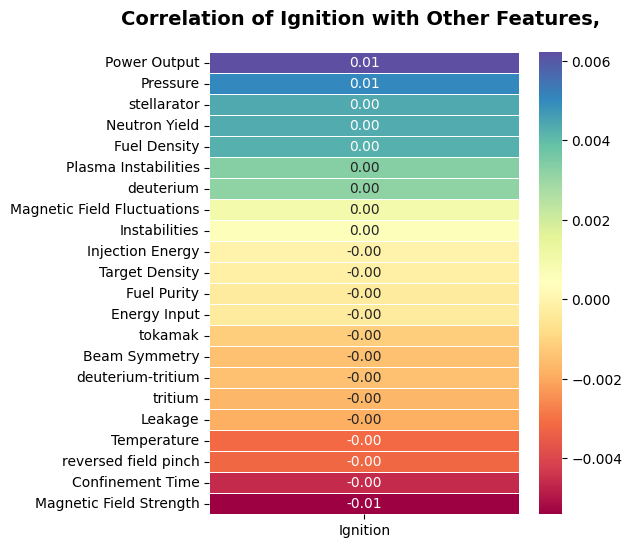

In [ ]:
target = 'Ignition'
corr_values = data.corr(numeric_only=True)[target].drop(target)
corr_df = corr_values.to_frame().sort_values(by=target, ascending=False)
plt.figure(figsize=(5, 6))
sns.heatmap(corr_df, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.7, cbar=True)
plt.title(f'Correlation of {target} with Other Features, ', fontsize=14, fontweight='bold', pad=20)
plt.show()

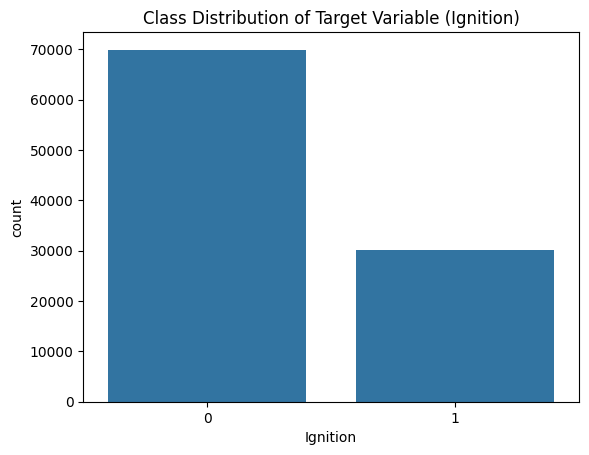

In [ ]:
# Check class distribution for the target variable
sns.countplot(x='Ignition', data=data)
plt.title('Class Distribution of Target Variable (Ignition)')
plt.show()


In [ ]:
scaler = StandardScaler()


In [ ]:
X = data.drop("Ignition", axis = 1)
y = data["Ignition"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression from Scratch**

In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [ ]:
lr_scratch = LogisticRegressionScratch()
lr_scratch.fit(X_train, y_train)
y_pred_scratch = lr_scratch.predict(X_test)
print("Classification Report (Logistic Regression from Scratch):")
print(classification_report(y_test, y_pred_scratch, zero_division=1))

Classification Report (Logistic Regression from Scratch):
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       1.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.85      0.50      0.41     20000
weighted avg       0.79      0.70      0.58     20000



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_scratch))


Confusion Matrix:
[[14046     0]
 [ 5954     0]]


**Two Models for Regression**

**Model- 1 Logistic Regression Using Scikit-learn**

In [ ]:
# Logistic Regression using scikit-learn
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Classification Report (Logistic Regression - scikit-learn):")
print(classification_report(y_test, y_pred_lr, zero_division=1))

Classification Report (Logistic Regression - scikit-learn):
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       1.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.85      0.50      0.41     20000
weighted avg       0.79      0.70      0.58     20000



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Confusion Matrix:
[[14046     0]
 [ 5954     0]]


**Model- 2 Random Forest Classifier**

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     14046
           1       0.24      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.47      0.50      0.41     20000
weighted avg       0.57      0.70      0.58     20000



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Confusion Matrix:
[[14018    28]
 [ 5945     9]]


**Compare Models**

In [ ]:
# Compare models
lr_accuracy = accuracy_score(y_test, y_pred_lr)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

Logistic Regression Accuracy: 0.7023
Random Forest Accuracy: 0.70135


**Which Model Performed Better?**

In [ ]:
if lr_accuracy > rf_accuracy:
    print("Logistic Regression performs better.")
elif rf_accuracy > lr_accuracy:
    print("Random Forest performs better.")
else:
    print("Both models perform equally well.")

Logistic Regression performs better.


**Hyper-parameter Optimizations**

In [48]:
grid_lr = GridSearchCV(LogisticRegression(random_state=4, max_iter=1000), param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_lr.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 0.001}


In [ ]:
# Hyperparameter Optimization for Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest:", grid_rf.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}


**Feature Selection**

In [ ]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Leakage', 'Magnetic Field Strength', 'Fuel Density', 'Temperature',
       'Confinement Time', 'Power Output', 'Pressure', 'Neutron Yield',
       'reversed field pinch', 'deuterium'],
      dtype='object')


**Final Model**

In [49]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

final_lr_model = LogisticRegression(**grid_lr.best_params_, random_state=42)
final_lr_model.fit(X_train_selected, y_train)
y_pred_final_lr = final_lr_model.predict(X_test_selected)
final_lr_accuracy = accuracy_score(y_test, y_pred_final_lr)

print("Final Logistic Regression Model Accuracy:", final_lr_accuracy)

Final Logistic Regression Model Accuracy: 0.7023


In [50]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final_lr))


Confusion Matrix:
[[14046     0]
 [ 5954     0]]


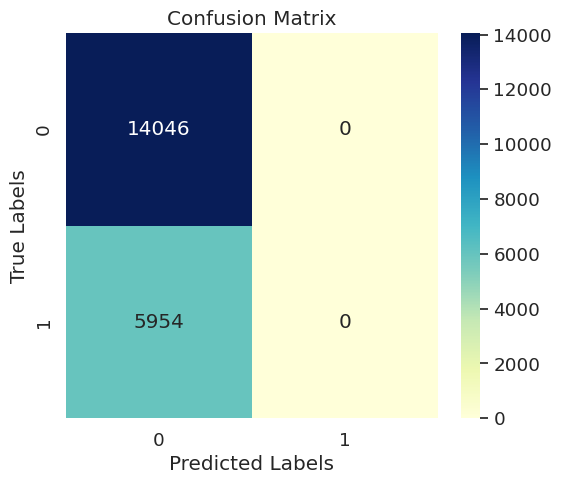

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Did the Model Performance Improved?**

In [51]:
# Print performance improvement comparison
if final_lr_accuracy > lr_accuracy:
    print("The final model improved performance compared to the original Logistic Regression model.")
elif final_lr_accuracy == lr_accuracy:
    print("The final model performance is the same as the original Logistic Regression model.")
else:
    print("The final model did not improve performance compared to the original Logistic Regression model.")

The final model performance is the same as the original Logistic Regression model.
